## Week3 授業前課題１　アヤメの分析  
「フィッシャーのアヤメ」という機械学習やデータ分析の世界で有名なデータセットを使い、基本的なデータの扱い方を学んでいきます。

これはカナダのガスペ半島のある牧草地で同じ日に採取された以下の3種類のアヤメ、合計150本のデータです。

setosa、virgiclor、virginicaはここで 目的変数 や ラベル と呼ばれるものに当たります。

1本ごとにsepal_length（がく片の長さ）, sepal_width（がく片の幅）, petal_length（花弁の長さ）, petal_width（花弁の幅）の4種類の情報が記録されています。この4種類を 特徴量 と呼びます。


scikit-learnという機械学習ライブラリにはirisデータセットが用意されているため、これを使用します。



### メンターコメント  
mentor 【メンター】後藤嶺 20/10/19 17:03  

お疲れ様でした！  

問題７はラベルごとに色分けしてください。  
matplotlibのカラーマップではどこがどの値を示しているかわかりにくいです。  
最後の相関係数行列はseabornを使って表示させてください。
<br>
<br>
<br>
mentor 荒井 浩希 20/10/21 16:08  

お疲れ様です。仕様を満たしているので合格です！！！  

ヒートマップの表示ですが、annot=Trueとするとヒートマップのマスに数値が表示されるので、一眼でわかりやすい可視化になると思います。

## 【問題1】データの取得  
>以下のドキュメントを参考にしながら、irisデータセット読み込みましょう。  
>データが読み込めたら、説明変数を下のようなPandasのDataFrame型変数Xに格納してください。  

In [1]:
import pandas as pd
# scikit-learn から　iris データセットを読み込む
from sklearn.datasets import load_iris

# iris データセットを変数に格納する
data = load_iris()

# 行と列のインデックスようのリストを用意
iris_data_columns=['sepal_length', 'sepal_width','petal_length','petal_width']
iris_target_columns=['Species']

# pandas のデータフレームにする
X = pd.DataFrame(data=data['data'], columns=iris_data_columns)
y = pd.DataFrame(data=data['target'], columns=iris_target_columns)

print("irisデータセットの 'data' のデータフレームを表示")
display(X)
print()
print("irisデータセットの 'target' のデータフレームを表示")
display(y)

irisデータセットの 'data' のデータフレームを表示


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3



irisデータセットの 'target' のデータフレームを表示


,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


## 【問題2】データの結合  
>問題1で準備したX,yを結合させたDataFrame型変数dfを作成してください。  
>結合することで扱いやすくなります。これ以降はこのdfを使っていきます。

In [2]:
# Xとyを列方向に結合
df = pd.concat([X, y], axis=1)

print("irisデータセットの 'data' と 'target' を結合したデータフレームを表示")
display(df)

irisデータセットの 'data' と 'target' を結合したデータフレームを表示


,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## 【問題3】データの確認  

>今回扱うデータがどのようなものなのかを確認します。以下の4つを行ってください。
>
>- 先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）  
>- ラベルごとのサンプル数の合計を出力する。  
>- 特徴量に欠損値があるかを確認する。  
>- 特徴量の平均値と標準偏差、四分位数を一度に表示させる。  
>
>DataFrameのメソッドである.head(),.info(),.describe(),.isnull(),.sum()や、  
>Seriesのメソッドである.value_countsなどを使ってみましょう。

In [3]:
# これ以降のデータの表示やグラフ表示を用意にするため特徴量をリストに入れる
features = ['sepal_length', 'sepal_width','petal_length','petal_width']


print("1. 先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。:\n{}"
     .format(df.head(4)))
print()

print("2. ラベルごとのサンプル数の合計を出力する。:\n{}"
     .format(df['Species'].value_counts(sort=False)))
print()

print("3-1. 特徴量に欠損値があるかを確認する。(1):\n{}"
     .format(df[features].isnull().sum()))
print()

print("3-2. 特徴量に欠損値があるかを確認する。(2):\n{}"
     .format(df.info()))
print()

print("4. 特徴量の平均値と標準偏差、四分位数を一度に表示させる。:\n{}"
     .format(df[features].describe()))
print()


1. 先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。:
   sepal_length  sepal_width  petal_length  petal_width  Species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0

2. ラベルごとのサンプル数の合計を出力する。:
0    50
1    50
2    50
Name: Species, dtype: int64

3-1. 特徴量に欠損値があるかを確認する。(1):
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   Species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory 

## 【問題4】irisデータセット自体の調査  
>ページのはじめで「カナダのガスペ半島のある牧草地で」と書きましたが、データセット自体についてもう少し調査しておきましょう。データセットを見る上で、そのデータセット自体について知っておくことも大切です。

「フィッシャーのアヤメ」は3種類のアイリス（Iris setosa、Iris virginica、Iris versicolor）のそれぞれ50個のサンプルで構成される多変量データのデータセットで、英国の統計学者、優生学者、そして生物学者 ロナルド・フィッシャーが1936年に論文に使用した。エドガー・アンダーソンが虹彩の形態学的変化を定量化するためにデータを収集したため、アンダーソンの虹彩データセットと呼ばれることもある。
3種のうち2種は、ガスペ半島で「すべて同じ牧草地から収集され、同じ日に摘み取られ、同じ装置を使用して同じ人によって同時に測定された」。

データセットは、3種類のアイリスのそれぞれ50個のサンプルについて4つの特徴が測定されたものである（がく片と花びらの長さと幅（センチメートル単位））。これらの4つの機能の組み合わせに基づいて、フィッシャーは種を互いに区別するための線形判別モデルを開発した。

フィッシャーの線形判別モデルに基づいて、このデータセットは、サポートベクターマシンなどの機械学習における多くの統計的分類手法の典型的なテストケースになった。

アイリスデータセットは、機械学習の目的で初心者向けのデータセットとして広く使用されており、機械学習パッケージScikit-learnのR（プログラミング言語） ベースとPythonに含まれているため、ユーザーはソースを見つけることなくデータセットにアクセスできる。

## 【問題5】必要なデータを抽出  

>DataFrameから必要なデータを抽出する方法を確認していきます。以下を行ってください。  
>
>- sepal_widthの列を３つの異なる方法で抽出する
>- 50番目から99番目までのデータを抽出する
>- petal_lengthの列の50番目から99番目までのデータを抽出する
>- petal_widthの値が0.2のデータを抽出する
>
>.locや.ilocを使うことになります。この２つはどう違うのかについて説明してください。



In [4]:
print("1-1. sepal_widthの列を３つの異なる方法で抽出する(1):\n{}"
     .format(df['sepal_width']))
print()

print("1-2. sepal_widthの列を３つの異なる方法で抽出する(2):\n{}"
     .format(df.loc[:,'sepal_width']))
print()

print("1-3. sepal_widthの列を３つの異なる方法で抽出する(3):\n{}"
     .format(df.iloc[:,1]))
print()

print("2. 50番目から99番目までのデータを抽出する:\n{}"
     .format(df[50:100]))
print()

print("3. petal_lengthの列の50番目から99番目までのデータを抽出する:\n{}"
     .format(df.loc[50:100]['petal_length']))
print()

print("4. petal_widthの値が0.2のデータを抽出する:\n{}"
     .format(df[df['petal_width'] ==0.2]))
print()


1-1. sepal_widthの列を３つの異なる方法で抽出する(1):
0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

1-2. sepal_widthの列を３つの異なる方法で抽出する(2):
0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

1-3. sepal_widthの列を３つの異なる方法で抽出する(3):
0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

2. 50番目から99番目までのデータを抽出する:
    sepal_length  sepal_width  petal_length  petal_width  Species
50           7.0          3.2           4.7          1.4        1
51           6.4          3.2           4.5          1.5        1
52           6.9          3.1           4.9          1.5        1
53           5.5          2.3           4.0          1.3        1
54           6.5          

## .loc と　.iloc の違い  

.loc は　ラベル名を直接入力することによって列を指定する方法で、  
.iloc は　番号によって表示したい列を指定する方法。

## 【問題6】図の作成  

>データは可視化して確認することが大切です。次の3つを行ってください。  
>作図のライブラリはMatplotlibの他seabornもよく使われます。
>
>- ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）
>- 特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する
>- 特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する
>
>箱ひげ図とバイオリン図は似た図を表示します。これらはどう違い、それぞれどのような利点があるのかについて説明してください。

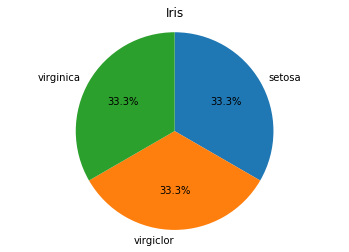

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

# ラベルごとのサンプル数を円グラフにする

# 円グラフの各項目の名前をリストに入れる
label = ["setosa", "virgiclor", "virginica"]

# ラベルごとの個数を取得
setosa_count = len(df[df['Species'] ==0])
virgiclor_count = len(df[df['Species'] ==1])
virginica_count = len(df[df['Species'] ==2])

# 各ラベルそれぞれの値をリストにまとめる
total_count = [setosa_count, virgiclor_count, virginica_count]

plt.title( 'Iris' )
# 円グラフの描画（上が開始地点になるよう開始を９０度に設定、パーセンテージは小数第一位まで）
plt.pie(total_count, labels=label, counterclock=False, startangle=90, autopct="%.1f%%")
# 座標軸を調整（丸が歪まないようにする）
plt.axis( 'equal' )
plt.show()


In [6]:
# 特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する

# グラフに必要なデータを変数に入れる

setosa_sl = df[df['Species'] ==0].loc[:,'sepal_length']
virgiclor_sl = df[df['Species'] ==1].loc[:,'sepal_length']
virginica_sl = df[df['Species'] ==2].loc[:,'sepal_length']

setosa_sw = df[df['Species'] ==0].loc[:,'sepal_width']
virgiclor_sw = df[df['Species'] ==1].loc[:,'sepal_width']
virginica_sw = df[df['Species'] ==2].loc[:,'sepal_width']

setosa_pl = df[df['Species'] ==0].loc[:,'petal_length']
virgiclor_pl = df[df['Species'] ==1].loc[:,'petal_length']
virginica_pl = df[df['Species'] ==2].loc[:,'petal_length']

setosa_pw = df[df['Species'] ==0].loc[:,'petal_width']
virgiclor_pw = df[df['Species'] ==1].loc[:,'petal_width']
virginica_pw = df[df['Species'] ==2].loc[:,'petal_width']

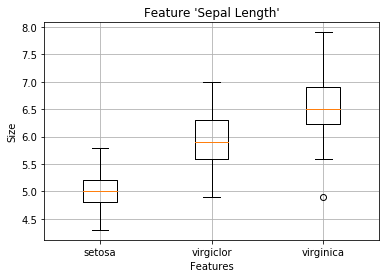

In [7]:
# sepal_length の特徴量の分布（箱ひげ図）

# 表示させたいデータを配列に格納
iris_sl = (setosa_sl, virgiclor_sl, virginica_sl)

fig = plt.figure()
ax = fig.add_subplot()


# 横軸のラベルの設定
ax.set_xticklabels(['setosa', 'virgiclor', 'virginica'])

# データをグラフにセット
ax.boxplot(iris_sl)

plt.title('Feature \'Sepal Length\'')
plt.xlabel('Features')
plt.ylabel('Size')
plt.grid()

# 描画
plt.show()

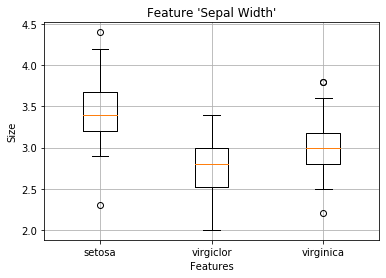

In [8]:
# sepal_width の特徴量の分布（箱ひげ図）

# 表示させたいデータを配列に格納
iris_sw = (setosa_sw, virgiclor_sw, virginica_sw)

fig = plt.figure()
ax = fig.add_subplot()


# 横軸のラベルの設定
ax.set_xticklabels(['setosa', 'virgiclor', 'virginica'])

# データをグラフにセット
ax.boxplot(iris_sw)

plt.title('Feature \'Sepal Width\'')
plt.xlabel('Features')
plt.ylabel('Size')
plt.grid()

# 描画
plt.show()

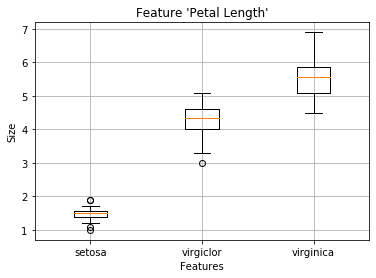

In [9]:
# petal_length の特徴量の分布（箱ひげ図）

# 表示させたいデータを配列に格納
iris_pl = (setosa_pl, virgiclor_pl, virginica_pl)

fig = plt.figure()
ax = fig.add_subplot()


# 横軸のラベルの設定
ax.set_xticklabels(['setosa', 'virgiclor', 'virginica'])

# データをグラフにセット
ax.boxplot(iris_pl)

plt.title('Feature \'Petal Length\'')
plt.xlabel('Features')
plt.ylabel('Size')
plt.grid()

# 描画
plt.show()

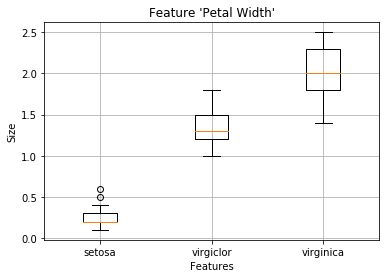

In [10]:
# petal_width の特徴量の分布（箱ひげ図）

# 表示させたいデータを配列に格納
iris_pw = (setosa_pw, virgiclor_pw, virginica_pw)

fig = plt.figure()
ax = fig.add_subplot()


# 横軸のラベルの設定
ax.set_xticklabels(['setosa', 'virgiclor', 'virginica'])

# データをグラフにセット
ax.boxplot(iris_pw)

plt.title('Feature \'Petal Width\'')
plt.xlabel('Features')
plt.ylabel('Size')
plt.grid()

# 描画
plt.show()

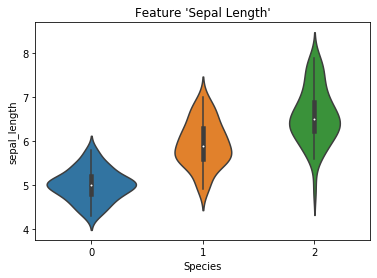

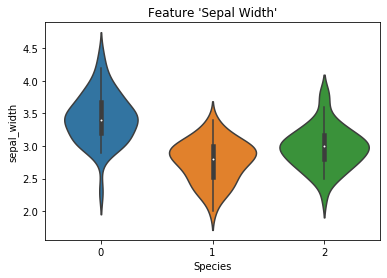

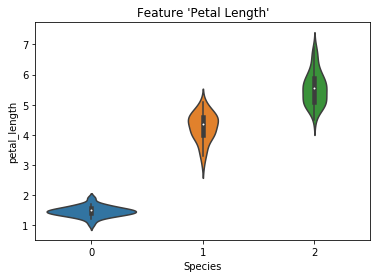

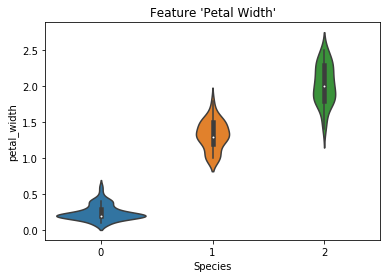

In [11]:
# ヴァイオリン図
import seaborn as sns
#sns.set()

# sepal_length の特徴量の分布
sns.violinplot(x=df['Species'], y=df['sepal_length'])\
                                    .set_title('Feature \'Sepal Length\'')

plt.show()

# sepal_width の特徴量の分布
plt.title('Feature \'Sepal Width\'')
sns.violinplot( x=df['Species'], y=df['sepal_width'] )\
                                    .set_title('Feature \'Sepal Width\'')
plt.show()

# petal_length の特徴量の分布
plt.title('Feature \'Petal Length\'')
sns.violinplot( x=df['Species'], y=df['petal_length'] )\
                                    .set_title('Feature \'Petal Length\'')
plt.show()

# petal_width の特徴量の分布
plt.title('Feature \'Petal Width\'')
sns.violinplot( x=df['Species'], y=df['petal_width'] )\
                                    .set_title('Feature \'Petal Width\'')


plt.show()


### 箱ひげ図とバイオリン図はどう違い、どのような利点があるのか 
箱ひげ図には平均/中央値と四分位範囲という要約統計量のみが含まれるのに対し、バイオリンプロットにはすべての分布データが含まれる点が異なる。これはデータ分布が複数のピークがある場合に特に有用である。このような場合、バイオリン図では複数のピークの位置と大きさが明確に表現されるが、これは箱ひげ図では表現されない。

## 【問題7】特徴量間の関係の確認  

>特徴量間の関係を見ていきます。次の4つを行ってください。
>
>- 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る(６つ)
>- 全ての組み合わせの散布図を一度に表示させる、散布図行列を作る(１つ)
>- ４つの特徴量に関する相関係数行列を作る
>- 相関係数行列のヒートマップを作る(１つ)
>
>相関係数行列はDataFrameのcorr()メソッドを使うことで求められます。

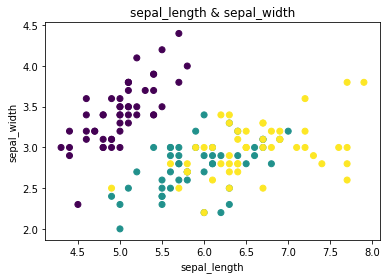

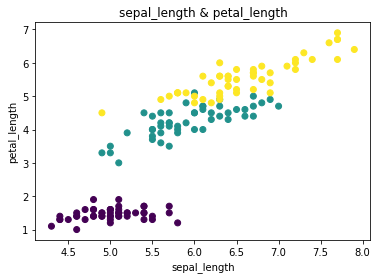

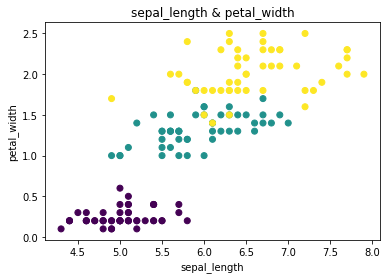

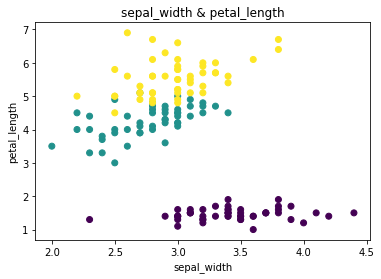

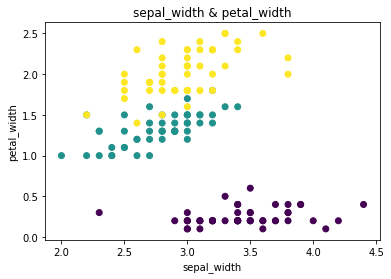

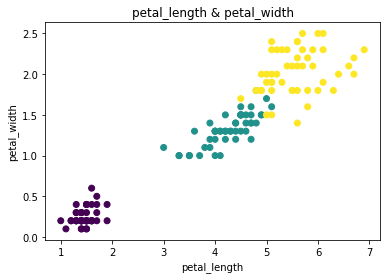

In [12]:
# 1 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る(６つ)


# 問題３で作成したリストfeaturesをループさせることですべての対応関係を表示
for i in range(len(features)):
    for j in range(len(features)):
        # 同種同士の組み合わせや既に表示した（順序逆の）組み合わせは不要なため除外
        if i >= j:
            continue
        else:
            # 散布図の作成
            plt.xlabel(features[i])
            plt.ylabel(features[j])
            plt.title(features[i] +' & '+ features[j])
            # プロットの色はラベルの列を使用
            plt.scatter(df[features[i]],df[features[j]], c=df['Species'])
            plt.show()

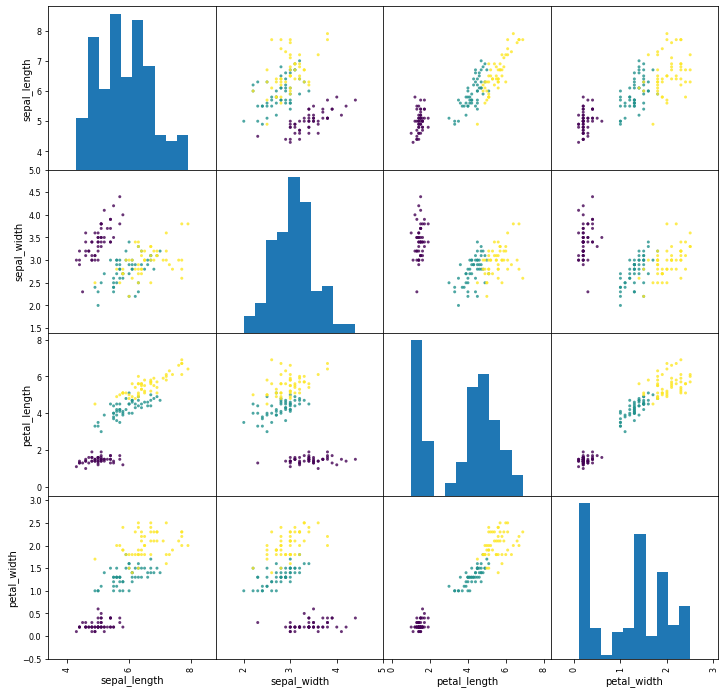

In [13]:
# 2 全ての組み合わせの散布図を一度に表示させる、散布図行列を作る(１つ)

# データフレームから特徴量の列だけ抜き出してscatter_matrixで表示
# プロットの色はラベルの列を使用
pd.plotting.scatter_matrix(df.iloc[:,:4], alpha=0.8, figsize=(12,12), range_padding=0.5,c=df['Species'])
plt.show()


In [14]:
#3 ４つの特徴量に関する相関係数行列を作る

# .corrメソッドを利用して各特徴量間の相関係数行列を作成
df_correlation_matrix = df.iloc[:,:4].corr()

print("４つの特徴量に関する相関係数行列:\n{}".format(df_correlation_matrix))

４つの特徴量に関する相関係数行列:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


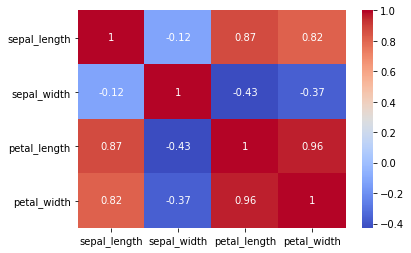

In [15]:
#4 相関係数行列のヒートマップを作る(１つ)
#plt.xlabel("column")
#plt.ylabel("row")
#plt.title("heatmap")
#plt.pcolor(df_correlation_matrix)
#plt.show()

#デフォルトカラーマップ
#sns.heatmap(df_correlation_matrix, annot=True)

# カラーマップ変更
colormap = plt.cm.coolwarm
sns.heatmap(df_correlation_matrix, cmap=colormap, linecolor='white', annot=True)


## 【問題8】可視化したグラフや表の結果の説明  

>データを探索した時には、結果を述べる（+考察する）ことが大切です。ここまでで作成した表や図から読み取れることや気づきを説明してください。  
>例えば、散布図行列を見ながら、3種類のアヤメにはどのような違いがあるかを説明してください。

散布図から、setosaはsepal_length、petal_length、petal_widthが他の２種と比較して短かく、  
virginicaは長い傾向にあることがわかった。virgiclorはその中間の長さであった。  
また、散布図からpetal_lengthとpetal_width、sepal_lengthとpetal_length、  
sepal_lengthとpetal_widthの組み合わせの相関が高いことがわかった。